In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Tensorflow
import tensorflow as tf

# Formatting...
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})


#Sklearn 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
normalizer = MinMaxScaler()

# Tensorflow - Multi Linear Regression y = mX + c


### Random Data and solving using Normal Equation

[1 2 3 4 5] [15 48 44 13 19]
[[ 1 15]
 [ 2 48]
 [ 3 44]
 [ 4 13]
 [ 5 19]] [[49]
 [37]
 [26]
 [39]
 [33]]


c:\users\nandpara\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(10, 50 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\nandpara\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(10, 50 + 1) instead
  


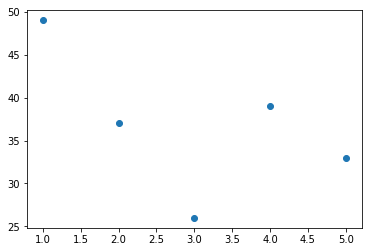

In [24]:
limit = 5 + 1
x1 = np.array([x for x in range(1, limit)])
x2 = np.random.random_integers(10, 50, size=5)

print(x1, x2)

X = np.stack((x1, x2), axis=1)
y = np.random.random_integers(10, 50, size=5).reshape(-1, 1)

print(X, y)
plt.scatter(X[...,0], y)

# Numpy Method 1

In [25]:
X_transpose = np.transpose(X)
print("X_transpose : ", X_transpose)

XtX = np.matmul(X_transpose, X)
print("XtX : ", XtX)

Xiy = np.matmul(X_transpose, y)
print("Xiy :",Xiy )

Inv = np.linalg.inv(XtX)
print("Inv :", Inv)

co_efficients = np.matmul(np.linalg.inv(XtX), Xiy)

print("co_efficients:" ,co_efficients)


X_transpose :  [[ 1  2  3  4  5]
 [15 48 44 13 19]]
XtX :  [[  55  390]
 [ 390 4995]]
Xiy : [[ 522]
 [4789]]
Inv : [[0.0407 -0.0032]
 [-0.0032 0.0004]]
co_efficients: [[6.0320]
 [0.4878]]


# Numpy Method 2

In [27]:
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("co_efficients:", b)

print("Predicted : {}".format(np.array([2, 2]).dot(b)))


co_efficients: [[6.0320]
 [0.4878]]
Predicted : [13.0397]


# Tensorflow Implementation

In [36]:
# dtype is changed to float
limit = 5 + 1
x1 = np.array([x for x in range(1, limit)], dtype=np.float64)
x2 = np.random.random(size=5)

print(x1, x2)

X = np.stack((x1, x2), axis=1)

print(X)
y = np.random.random(size=5).reshape(-1, 1)


XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
with tf.Session() as sess:
    Theta = sess.run(theta)
    print(Theta)

[1.0000 2.0000 3.0000 4.0000 5.0000] [0.3712 0.8209 0.3941 0.8543 0.4366]
[[1.0000 0.3712]
 [2.0000 0.8209]
 [3.0000 0.3941]
 [4.0000 0.8543]
 [5.0000 0.4366]]
[[0.1371]
 [-0.2873]]
